### METODO 1:
   **Sacamos el valor en vivo **

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use("ggplot")

In [2]:
from googlefinance import getQuotes

ImportError: cannot import name getQuotes

In [69]:
import json

In [58]:
print json.dumps(getQuotes('TM'), indent=2)

HTTPError: HTTP Error 404: Not Found

### METODO 2: 
   **Sacamos historico de un valor**

In [15]:
## https://pypi.python.org/pypi/googlefinance.client/1.2.2

In [70]:
from googlefinance.client import get_price_data, get_closing_data, get_open_close_data, get_prices_data

In [27]:
param = {
    'q': ".DJI", # Stock symbol (ex: "AAPL")
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "INDEXDJX", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "1Y" # Period (Ex: "1Y" = 1 year)
}

In [28]:
df = get_price_data(param)

In [29]:
df.head()

,Open,High,Low,Close,Volume
2016-11-17 22:00:00,18866.22,18904.03,18845.27,18903.82,89925772
2016-11-18 22:00:00,18905.33,18915.74,18853.83,18867.93,109880725
2016-11-21 22:00:00,18898.68,18960.76,18883.10,18956.69,80520707
2016-11-22 22:00:00,18970.39,19043.90,18962.82,19023.87,85308309
2016-11-23 22:00:00,19015.52,19083.76,19000.38,19083.18,77879432


In [30]:
df.shape

(252, 5)

In [31]:
### OK funciona. Voy a hacer la prueba con DAX

In [71]:
param = {
    'q': "DAX", # Stock symbol (ex: "AAPL")
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "INDEXDB", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "1Y" # Period (Ex: "1Y" = 1 year)
}

In [72]:
df = get_price_data(param)

In [34]:
df.head()

,Open,High,Low,Close,Volume
2016-11-17 22:00:00,24.05,24.14,24.0350,24.0600,4140
2016-11-18 22:00:00,23.95,23.95,23.8400,23.8800,1179
2016-11-21 22:00:00,24.11,24.11,23.9482,23.9800,6078
2016-11-23 22:00:00,23.86,23.86,23.7000,23.7807,5713
2016-11-25 19:00:00,23.81,23.81,23.8100,23.8100,1050


In [35]:
df.shape

(250, 5)

#### Vamos a sacar un valor del Nasdaq y a visualizarlo:

    Elegimos Apple y sacamos todos los días por el período de un año

In [73]:
param = {
    'q': "AAPL", # Stock symbol (ex: "AAPL")
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "NASD", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "1Y" # Period (Ex: "1Y" = 1 year)
}

In [75]:
df = get_price_data(param)

In [76]:
df.tail()

,Open,High,Low,Close,Volume
2017-11-10 22:00:00,175.11,175.3800,174.27,174.67,25145500
2017-11-13 22:00:00,173.50,174.5000,173.40,173.97,16982080
2017-11-14 22:00:00,173.04,173.4800,171.18,171.34,24782487
2017-11-15 22:00:00,169.97,170.3197,168.38,169.08,29158070
2017-11-16 22:00:00,171.18,171.8700,170.30,171.10,23637484


In [77]:
del df['Volume']

In [78]:
#df['Intra'] = df['Close'] - df['Open']

In [81]:
df.tail()

,Open,High,Low,Close,Time
2017-11-10 22:00:00,175.11,175.3800,174.27,174.67,2017-11-10 22:00:00
2017-11-13 22:00:00,173.50,174.5000,173.40,173.97,2017-11-13 22:00:00
2017-11-14 22:00:00,173.04,173.4800,171.18,171.34,2017-11-14 22:00:00
2017-11-15 22:00:00,169.97,170.3197,168.38,169.08,2017-11-15 22:00:00
2017-11-16 22:00:00,171.18,171.8700,170.30,171.10,2017-11-16 22:00:00


In [80]:
df['Time'] = df.index

In [82]:
df_M = pd.melt(df, id_vars= 'Time' , var_name="OpenHighLowCloseIntra", value_name="Value")

In [118]:
df_M.head()

,Time,OpenHighLowCloseIntra,Value
0,2016-11-18 22:00:00,Open,109.72
1,2016-11-21 22:00:00,Open,110.12
2,2016-11-22 22:00:00,Open,111.95
3,2016-11-23 22:00:00,Open,111.36
4,2016-11-25 19:00:00,Open,111.47


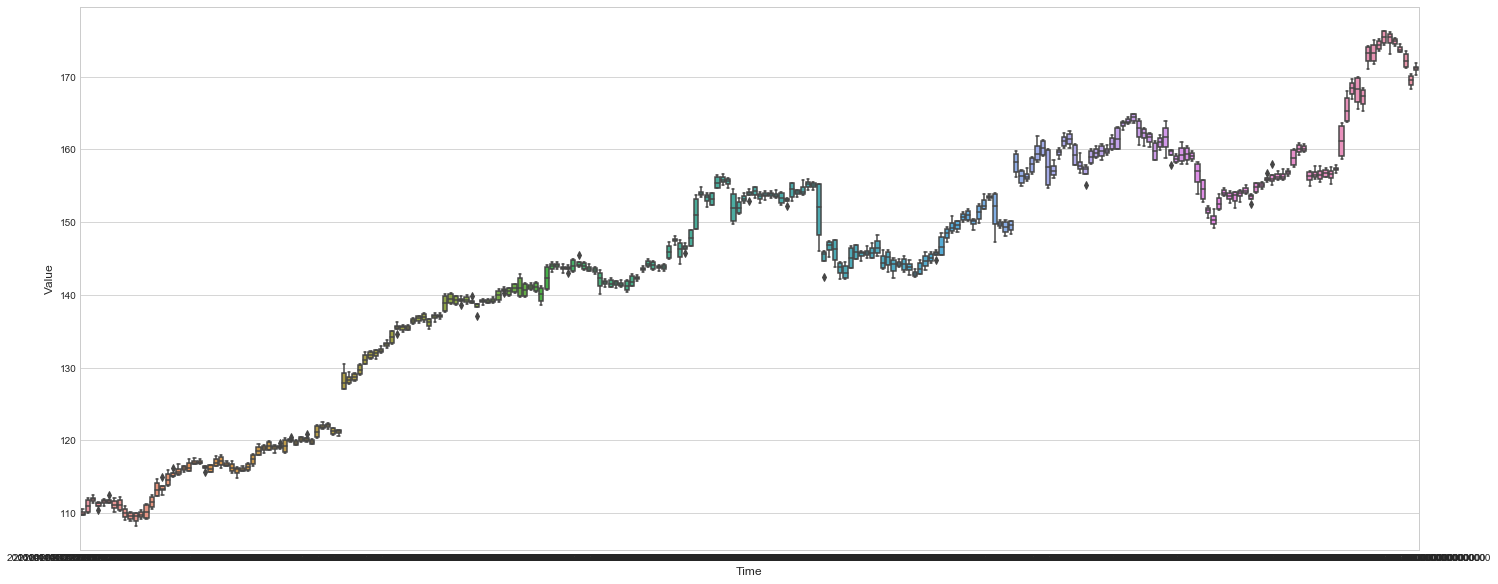

In [86]:
plt.figure(figsize=(24,10))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Time", y="Value", data=df_M)
plt.show()

    Ahora vamos a pobar a hacer un gráfico dinámico con Plotly:

In [87]:
import plotly.offline as py
import plotly.graph_objs as go

In [98]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-21,110.12,111.99,110.01,111.73,29264571
2016-11-22,111.95,112.42,111.40,111.80,25965534
2016-11-23,111.36,111.51,110.33,111.23,27426394
2016-11-25,111.47,111.87,110.95,111.79,11475922
2016-11-28,111.43,112.46,111.39,111.57,27193983


     Para poder utilizar algunas funcionalidades de Plotly lo mejor es crear una freeAcount. El ApiKey lo puedes encontrar en tu perfil en plotly: 
    https://plot.ly/settings/api
    https://plot.ly/python/getting-started/ 
     A continuación conectamos nuestro notebook a la cuenta:

In [115]:
import plotly 
plotly.tools.set_credentials_file(username='ISANJUAN', api_key='FfGxbQfXktRONcYyDlbg')

    Ahora ya podemos hacer nuestro gráfico:

In [116]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader.data as web
from datetime import datetime


trace = go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)
data = [trace]
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ISANJUAN/0 or inside your plot.ly account where it is named 'simple_candlestick'


    En esta prueba, envez de meter el dataframe creado, directamente lo descargamos de la API de google:

In [117]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader.data as web
from datetime import datetime

df = web.DataReader("aapl", 'google')

trace = go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)
data = [trace]
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ISANJUAN/0 or inside your plot.ly account where it is named 'simple_candlestick'


#### Vamos a probar distintas maneras de extraer info de las APIS de google y yahoo:

    1. API de Google Finance:

In [105]:
import pandas_datareader.data as web
df = web.DataReader("aapl", 'google')

In [107]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-10,175.11,175.38,174.27,174.67,25145500
2017-11-13,173.50,174.50,173.40,173.97,16982080
2017-11-14,173.04,173.48,171.18,171.34,24782487
2017-11-15,169.97,170.32,168.38,169.08,29158070
2017-11-16,171.18,171.87,170.30,171.10,23637484


    2. API de Yahoo Finance:

In [109]:
import pandas_datareader as pdr
Daimler = pdr.get_data_yahoo('DAI.DE')

In [110]:
Daimler.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-13,70.690002,70.959999,69.430000,70.279999,70.279999,2908362.0
2017-11-14,70.610001,70.709999,69.660004,69.699997,69.699997,2494238.0
2017-11-15,69.190002,69.339996,68.559998,69.309998,69.309998,3621236.0
2017-11-16,69.699997,70.080002,69.300003,69.339996,69.339996,2329663.0
2017-11-17,69.410004,69.589996,68.849998,68.970001,68.970001,2743588.0


In [119]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader.data as web
from datetime import datetime

df = web.DataReader("DAI.DE", 'yahoo')

trace = go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)
data = [trace]
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ISANJUAN/0 or inside your plot.ly account where it is named 'simple_candlestick'


In [169]:
#https://es.stackoverflow.com/questions/39289/dos-gr%C3%A1ficos-interactivos-en-una-sola-ventana-con-matplotlib

In [115]:
### OK funciona. Voy a hacer la prueba con un valor del DAX

In [215]:
param = {
    'q': "DAI", # Stock symbol (ex: "AAPL")
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "ETR", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "1Y" # Period (Ex: "1Y" = 1 year)
}

In [216]:
df = gfc.get_price_data(param)

In [217]:
df.tail()

,Open,High,Low,Close,Volume


In [137]:
### Voy a tratar de conseguir el ticker:

In [110]:
import bs4 as bs
import requests

resp = requests.get('https://en.wikipedia.org/wiki/DAX')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', { 'class': 'wikitable sortable'})
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[3].text
print(ticker)

VNA
